In [2]:
import tensorflow as tf

tf.__version__

'2.2.0'

In [15]:
# Data set

mnist = tf.keras.datasets.mnist   # hand-written dataset

(x_train, y_train),(x_test, y_test) = mnist.load_data()

# Normalize to scale the values from 0 to 1

x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test  =  tf.keras.utils.normalize(x_test, axis = 1)

# build the model

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())  # input layers

model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))   # hidden layers
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', 
             metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 3)


Epoch 1/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2648 - accuracy: 0.9223
Epoch 2/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1044 - accuracy: 0.9680
Epoch 3/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0717 - accuracy: 0.9778: 0s - loss: 0.0701 - ac


In [17]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 0s 904us/step - loss: 0.0867 - accuracy: 0.9712
0.08667201548814774 0.9711999893188477


In [18]:
model.save('num_reader.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: num_reader.model/assets


In [20]:
new_model = tf.keras.models.load_model('num_reader.model')

In [22]:
predictions = new_model.predict(x_test)
print(predictions)

[[2.4254558e-09 7.7900186e-10 1.8024690e-06 ... 9.9998808e-01
  2.2871869e-09 1.3715069e-07]
 [7.6040524e-10 2.6983419e-04 9.9972719e-01 ... 2.3178491e-10
  3.7270883e-07 8.0331992e-13]
 [3.9397179e-07 9.9989212e-01 6.9071343e-06 ... 6.0598817e-05
  2.5768721e-05 3.2035227e-06]
 ...
 [1.2451530e-07 4.7265862e-06 5.7547485e-08 ... 7.6442328e-04
  1.0163410e-05 1.8773570e-03]
 [1.2876591e-05 7.1811392e-08 3.5172856e-09 ... 8.7543485e-06
  7.8071913e-05 1.2593728e-07]
 [9.3796686e-08 4.7053126e-09 2.5507514e-08 ... 2.0820689e-12
  5.6498035e-08 4.1049231e-09]]


In [30]:
import numpy as np

print(np.argmax(predictions[7]))

9


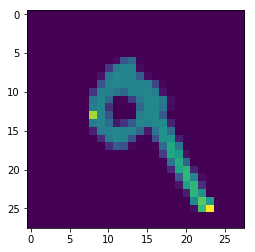

In [31]:
import matplotlib.pyplot as plt
plt.imshow(x_test[7])
#plt.show(x_train[0])

#print(x_train[0])